In [8]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,History

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import itertools

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:

keras.__version__

'2.12.0'

In [4]:
model = keras.models.load_model('/content/raks_model14.h5')

In [5]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

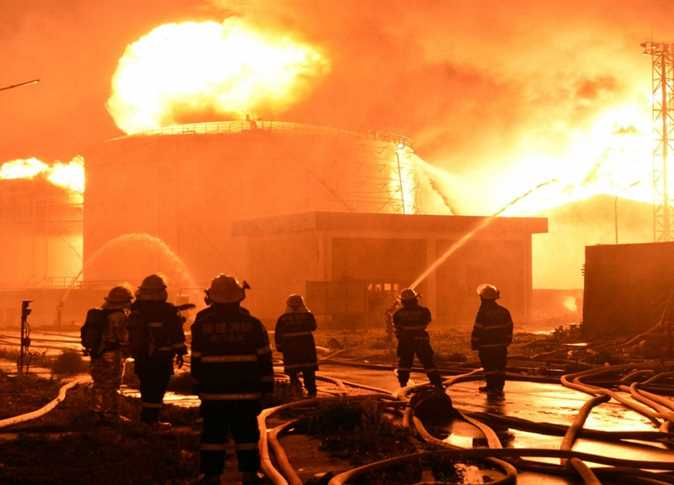

In [6]:
from IPython.display import Image
Image(filename='/content/14.png', width=300,height=200) 

In [9]:
preprocessed_image = prepare_image('/content/14.png')
predictions = model.predict(preprocessed_image)
print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
labels=(predictions>0.5).astype(np.int)

if labels[0][0]==1 :
    print("Fire detected")
else:
    print("No Fire detected")



1/1 [==============================] - 7s 7s/step
Fire : 0.02%  |Not Fire: 99.9%
No Fire detected


<ipython-input-9-a5030d30a9c8>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=(predictions>0.5).astype(np.int)
